# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gazli
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | kyzyl
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | dudinka
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | mongoumba
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | puerto tirol
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | ambodifotatra
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | sinabang
Processing Record 19 of Set 1 | jumla
Processing Record 20 of Set 1 | castillos
Processing Record 21 of Set 1 | oualidia
City not found. Skipping...
Processing Record 22 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gazli,40.1333,63.4500,4.09,50,98,4.83,UZ,1704910353
1,grytviken,-54.2811,-36.5092,5.21,96,100,1.54,GS,1704910353
2,kyzyl,51.7000,94.4500,-19.43,91,99,0.45,RU,1704910354
3,adamstown,-25.0660,-130.1015,24.23,85,42,4.35,PN,1704910354
4,papatowai,-46.5619,169.4708,15.02,73,46,2.77,NZ,1704910355


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gazli,40.1333,63.4500,4.09,50,98,4.83,UZ,1704910353
1,grytviken,-54.2811,-36.5092,5.21,96,100,1.54,GS,1704910353
2,kyzyl,51.7000,94.4500,-19.43,91,99,0.45,RU,1704910354
3,adamstown,-25.0660,-130.1015,24.23,85,42,4.35,PN,1704910354
4,papatowai,-46.5619,169.4708,15.02,73,46,2.77,NZ,1704910355


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

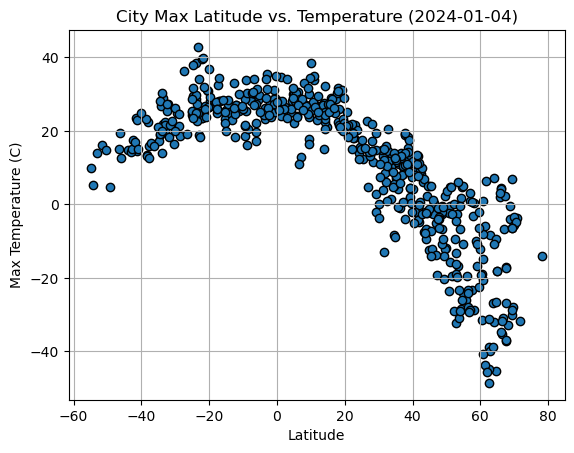

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values,edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2024-01-04)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

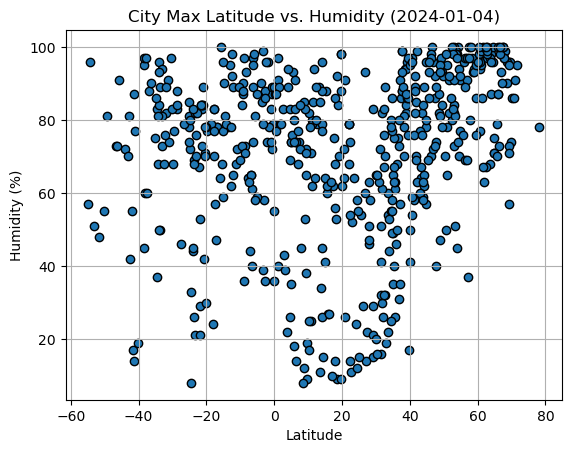

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values,edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Humidity (2024-01-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)



# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

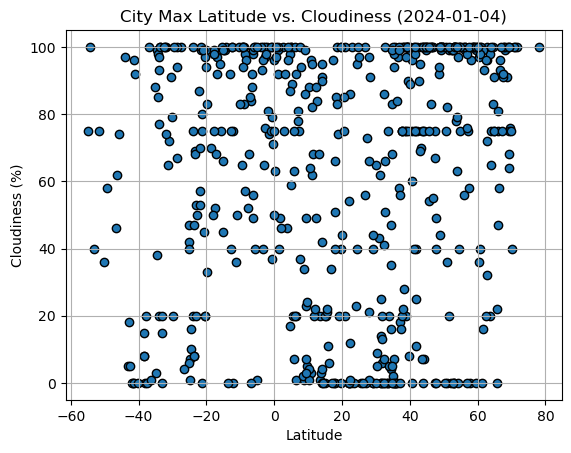

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values,edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Cloudiness (2024-01-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

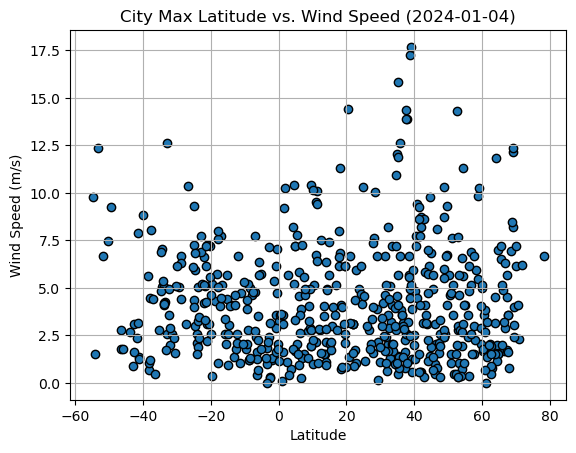

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values,edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Wind Speed (2024-01-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, text_position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is : {rvalue}")
    

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_position,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gazli,40.1333,63.4500,4.09,50,98,4.83,UZ,1704910353
2,kyzyl,51.7000,94.4500,-19.43,91,99,0.45,RU,1704910354
5,dudinka,69.4058,86.1778,-30.18,96,68,4.02,RU,1704910360
6,albany,42.6001,-73.9662,8.23,59,90,3.13,US,1704910219
7,colonia,50.9333,6.9500,-0.54,65,0,1.54,DE,1704910361


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,5.21,96,100,1.54,GS,1704910353
3,adamstown,-25.0660,-130.1015,24.23,85,42,4.35,PN,1704910354
4,papatowai,-46.5619,169.4708,15.02,73,46,2.77,NZ,1704910355
10,puerto natales,-51.7236,-72.4875,16.25,48,75,6.69,CL,1704910362
11,port elizabeth,-33.9180,25.5701,21.17,96,20,4.12,ZA,1704910362


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8551201489467045


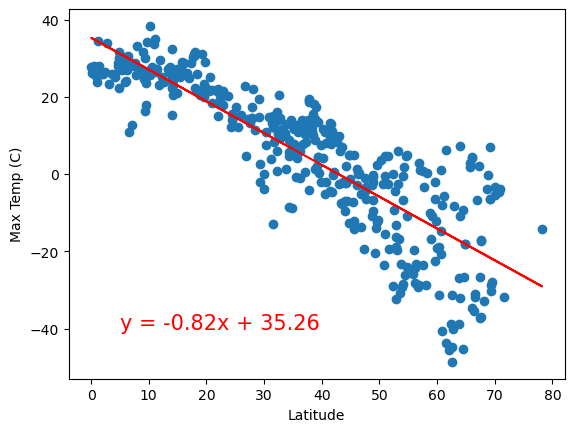

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (C)", (5, -40))

The r-value is : 0.5682214779304361


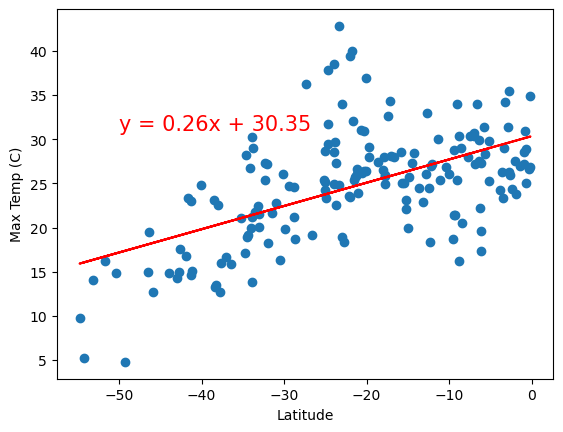

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (C)", (-50, 31))

**Discussion about the linear relationship:** 

As we can see in the scatterplot above, we can conclude that there exists a strong negative correlation between Max Temp and Latitude in the Northern Hemisphere. Also, there exists a moderate positive correlation between Max Temp and Latitude in the Southern Hemisphere. We can say that the hemisphere is directly correlated with the temperatures in the cities and also de latitud is a fact. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.42602610082901554


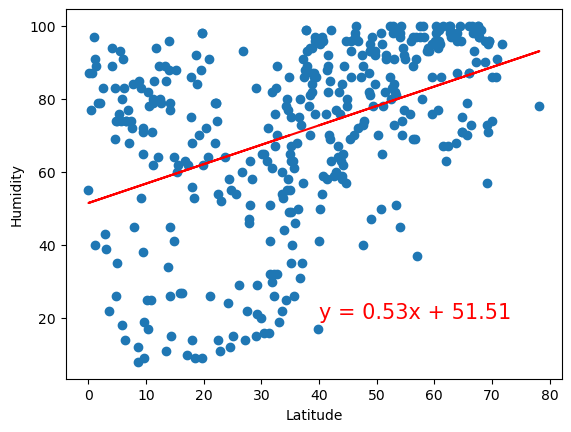

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


plot_linear_regression(x_values, y_values, "Latitude", "Humidity", (40, 20))

The r-value is : 0.13183738524957445


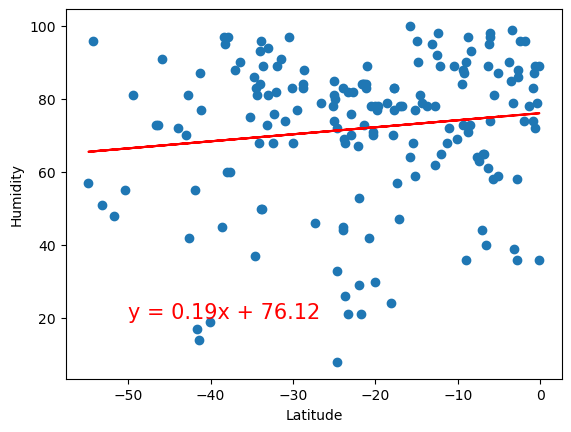

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


plot_linear_regression(x_values, y_values, "Latitude", "Humidity", (-50, 20))

**Discussion about the linear relationship:** 

As we can see in the scatterplot above, we can conclude that there exists a weak positive correlation between Humidity and Latitude in the Northern Hemisphere. Also, there exists a no or very weak positive correlation between Humidity and Latitude in the Southern Hemisphere. In conclusion, we can say that in general, the Humidity compared with Latitud in cities does not correlate with the hemisphere, no matter which one.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.25717975334115867


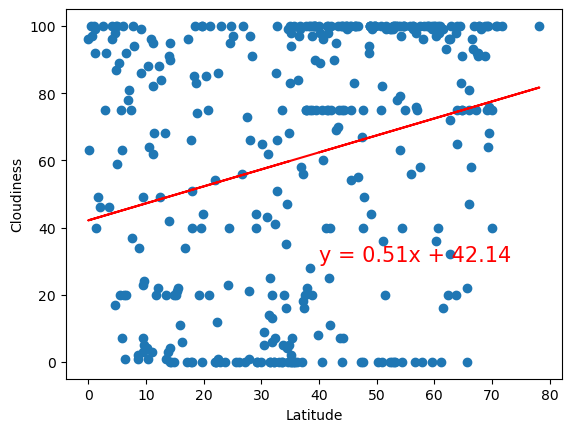

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", (40, 30))

The r-value is : 0.3095231996383994


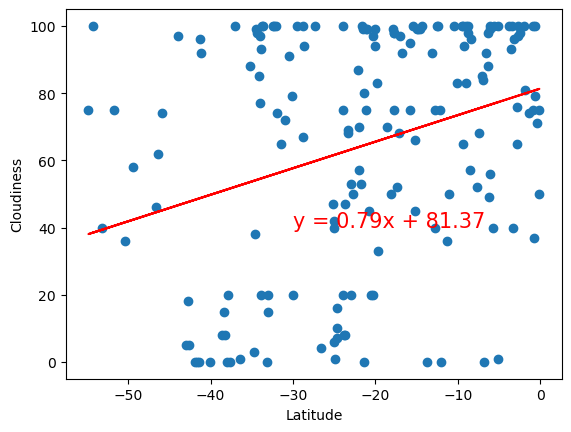

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", (-30, 40))

**Discussion about the linear relationship:** 

As we can see in the scatterplot above, we can conclude that there exists a no or very weak positive correlation between Cloudiness and Latitude in the Northern Hemisphere. Also, there exists a very weak positive correlation between Cloudiness and Latitude in the Southern Hemisphere. In conclusion, we can say that in general, the Cloudiness compared with Latitud in cities does not correlate with the hemisphere, no matter which one. We can appreciate how all those points are everywhere in te scatterplot. there is not a tendency, so far we can say that Cloudiness and Latitud for sure are not correlated at all.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.002982785489043366


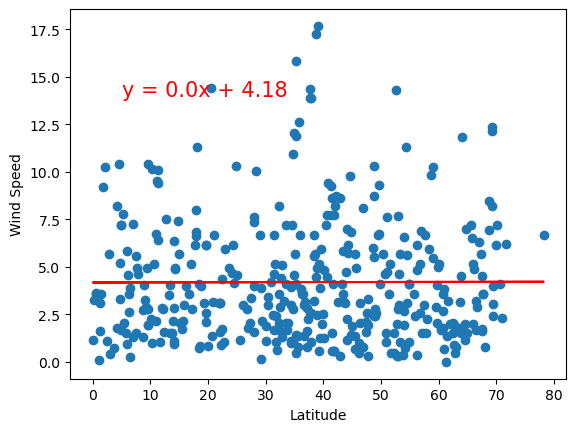

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (5, 14))

The r-value is : -0.2415696125440773


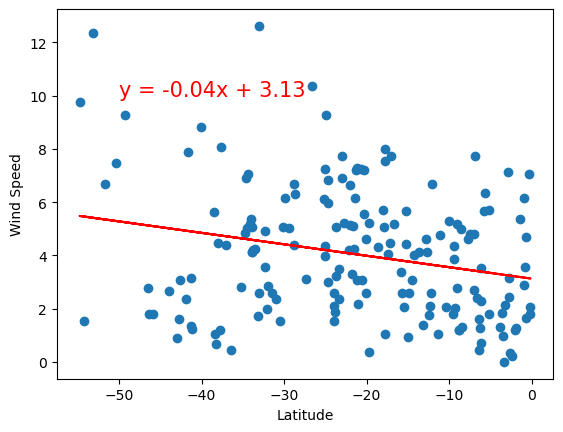

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (-50, 10))

**Discussion about the linear relationship:** 

As we can see in the scatterplot above, we can conclude that there exists a no or very weak positive correlation between Wind Speed and Latitude in the Northern Hemisphere. Also, there exists a no or very weak negative correlation between Wind Speed and Latitude in the Southern Hemisphere. In conclusion, we can say that in general, the Wind Speed compared with Latitud in cities does not correlate with the hemisphere, no matter which one. The Wind Speed is not correlated with the latitud and of course with te hemisphere. we can notice how all those points are everywhere in the scatterplot.